In [60]:
!pip install lightgbm

In [61]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('weather_forecast_data.csv')

In [63]:
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [65]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


In [66]:
X = df.drop('Rain', axis=1)
y = df['Rain']

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()
y = le.fit_transform(y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [71]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'LGBM': LGBMClassifier()
}

In [72]:
best_estimators = {}
for name, model in models.items():
    print(f"Performing Grid Search for {name}...")

    if name == 'Decision Tree':
        param_grid = {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    elif name == 'Naive Bayes':
        param_grid = {
            'var_smoothing': [1e-9, 1e-8, 1e-7],
            'priors': [None]
        }
    elif name == 'SVM':
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    elif name == 'LGBM':
        param_grid = {
            'num_leaves': [31, 50, 100],
            'max_depth': [10, 20, -1],
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [50, 100, 200]
        }
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [73]:
best_model = None
best_score = 0

for name, model in best_estimators.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    print(f"{name} - Cross-Validated F1 Score: {cv_score:.3f}")
    if cv_score > best_score:
        best_score = cv_score
        best_model = model

Decision Tree - Cross-Validated F1 Score: 0.994
Random Forest - Cross-Validated F1 Score: 0.996
Naive Bayes - Cross-Validated F1 Score: 0.827
SVM - Cross-Validated F1 Score: 0.915
[LightGBM] [Info] Number of positive: 206, number of negative: 1394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128750 -> initscore=-1.912056
[LightGBM] [Info] Start training from score -1.912056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [74]:
print(best_model)

RandomForestClassifier(n_estimators=200)


In [76]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nBest Model:", best_model)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Best Model: RandomForestClassifier(n_estimators=200)
Accuracy: 0.998
Precision: 1.000
Recall: 0.982
F1 Score: 0.991


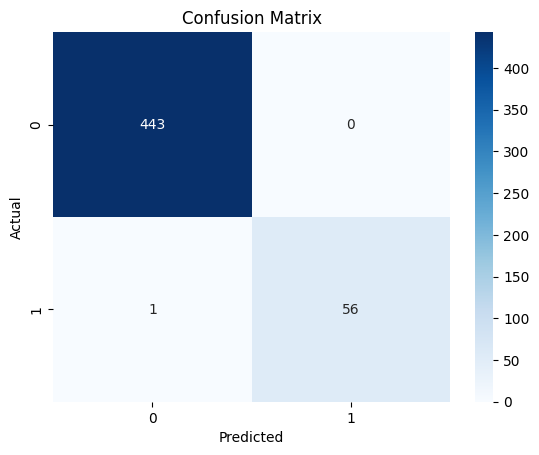

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [79]:
new_data = X_test[0].reshape(1, -1)  # Taking the first instance from X_test
pred = best_model.predict(new_data)
print("Prediction for new data:", "Rain" if pred[0] == 1 else "No Rain")

Prediction for new data: No Rain
